<a href="https://colab.research.google.com/github/Near32/SymbolicBehaviourBenchmark/blob/main/data_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup :

In [1]:
!git clone https://github.com/Near32/SymbolicBehaviourBenchmark ; cd SymbolicBehaviourBenchmark; git pull

Cloning into 'SymbolicBehaviourBenchmark'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (220/220), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 220 (delta 130), reused 122 (delta 52), pack-reused 0
Receiving objects: 100% (220/220), 544.20 KiB | 2.25 MiB/s, done.
Resolving deltas: 100% (130/130), done.
Already up to date.


In [2]:
!pip install -e SymbolicBehaviourBenchmark/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/SymbolicBehaviourBenchmark
     |████████████████████████████████| 626 kB 9.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.23.1-py3-none-any.whl size=701377 sha256=428e7d4314cff09a63d79cf1eb7cf9f1f06a8148f8d0d58e89757d17acde82c8
  Stored in directory: /root/.cache/pip/wheels/e3/33/04/6723848e46f0f1ebe794bb329b7c761c3329a0d7ffade99da7
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3
  Running setup.py develop for SymbolicBehaviourBenchmark


In [3]:
!pip install seaborn pandas matplotlib patchworklib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 725 kB/s 
     |████████████████████████████████| 11.2 MB 11.7 MB/s 
     |████████████████████████████████| 944 kB 61.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


# Gathering Data:

In [165]:
import pandas as pd
import numpy as np 

import symbolic_behaviour_benchmark
import gym

env_name = "SymbolicBehaviourBenchmark-ReceptiveConstructiveTestEnv-v0"
config = {
    "nbr_shots":1,
    "nbr_communication_rounds": 1,
    "vocab_size": 6,
    "max_sentence_length": 3,
    "descriptive": True,
    "nbr_latents": 3,
    "min_nbr_values_per_latent": 2,
    "max_nbr_values_per_latent": 5,
    "nbr_object_centric_samples": 16,
    "nbr_distractors": 0,
    "use_communication_channel_permutations": True,
    "allow_listener_query": False,
    "provide_listener_feedback": True,
    "sampling_strategy": "component-focused-2shots",
}

env = gym.make(env_name, **config)

In [166]:
env.unwrapped.__dict__

{'_np_random': RandomNumberGenerator(PCG64) at 0x7FAA748BF650,
 'action_space': Dict(communication_channel:CommunicationChannel([7 7 7]), decision:Discrete(2)),
 'allow_listener_query': False,
 'communication_channel_action_space': CommunicationChannel([7 7 7]),
 'communication_channel_observation_space': CommunicationChannel([7 7 7]),
 'datasets': {'test': <symbolic_behaviour_benchmark.utils.dual_labeled_dataset.DualLabeledDataset at 0x7faa72dc0850>,
  'train': <symbolic_behaviour_benchmark.utils.dual_labeled_dataset.DualLabeledDataset at 0x7faa72fc9bd0>},
 'decision_space': Discrete(2),
 'feedback_provided': False,
 'id_length': 10,
 'listener_feedback': True,
 'max_sentence_length': 3,
 'mode': 'train',
 'mode_id_observation_space': MultiBinary(2),
 'nbr_communication_rounds': 1,
 'nbr_distractors': 0,
 'nbr_latents': 3,
 'nbr_players': 2,
 'nbr_shots': 1,
 'observation_space': Dict(communication_channel:CommunicationChannel([7 7 7]), mode_id:MultiBinary(2), other_agent_id:Box(0, 25

In [167]:
env.unwrapped.rg_config

{'curriculum_distractors_window_size': 25,
 'descriptive': True,
 'descriptive_target_ratio': 0.5,
 'distractor_sampling': 'uniform',
 'graphtype': 'reinforce-like',
 'gumbel_softmax_eps': 1e-06,
 'max_sentence_length': 3,
 'nbr_communication_rounds': 1,
 'nbr_distractors': 0,
 'nbr_experience_repetition': 1,
 'nbr_latents': 3,
 'nbr_stimulus': 1,
 'object_centric': True,
 'observability': 'full',
 'tau0': 0.2,
 'unsupervised_segmentation_factor': None,
 'use_curriculum_nbr_distractors': False,
 'vocab_size': 6}

In [168]:
env.action_space

Dict(communication_channel:CommunicationChannel([7 7 7]), decision:Discrete(2))

In [169]:
env.observation_space

Dict(communication_channel:CommunicationChannel([7 7 7]), mode_id:MultiBinary(2), other_agent_id:Box(0, 255, (10,), uint8), previous_game_result:MultiBinary(2), previous_game_reward:Box(-10.0, 10.0, (1,), float32), role_id:MultiBinary(2), stimulus:Box(-1.0, 1.0, (3,), float32))

In [170]:
from symbolic_behaviour_benchmark.rule_based_agents import PositionallyDisentangledSpeakerAgent, PositionallyDisentangledListenerAgent

posdis_speaker = PositionallyDisentangledSpeakerAgent(
    action_space_dim=None,
    vocab_size=config['vocab_size'],
    max_sentence_length=config['max_sentence_length'],
    nbr_communication_rounds=config['nbr_communication_rounds'],
    nbr_latents=config['nbr_latents'],
)

posdis_listener = PositionallyDisentangledListenerAgent(
    action_space_dim=None,
    vocab_size=config['vocab_size'],
    max_sentence_length=config['max_sentence_length'],
    nbr_communication_rounds=config['nbr_communication_rounds'],
    nbr_latents=config['nbr_latents'],
)

print(posdis_speaker)
print(posdis_listener)

In [171]:
def ohe_comm_channel(
    communication_channel,
    max_sentence_length,
    vocabulary_size):
    token_start = 0
    communication_channel_observation_space_size = max_sentence_length*(vocabulary_size+1)
    new_communication_channel = np.zeros((1, communication_channel_observation_space_size))
    for token_idx in communication_channel[0]:
        new_communication_channel[0, int(token_start+token_idx)] = 1
        token_start += vocabulary_size+1
    return new_communication_channel

In [172]:
samples = []
dimensions = []
steps = []
values = []
latent_ids = []
rg_id = []

latent_strides = [1]
dims = [config['max_nbr_values_per_latent'] for _ in range(config['nbr_latents'])]
for idx in range(config['nbr_latents']):
    latent_strides.append(np.prod(dims[-idx-1:]))
latent_strides = list(reversed(latent_strides[:-1]))
print(latent_strides)

def coord2idx(coord):
    idx = 0
    for stride, mult in zip(latent_strides,coord):
        idx += stride*mult
    return idx

obs, infos = env.reset()

posdis_speaker.reset()
posdis_listener.reset()
speaker_tokens = []


done = False
iteration = 0
rg_idx = 0
while not done:
    iteration += 1
    
    speaker_action = env.action_space.sample()
    posdis_speaker_action = posdis_speaker.next_action(
        state=obs[0]['stimulus'],
        infos=infos[0]
    )
    print(f"Latent Values of the Target Stimulus: {infos[0]['speaker_exp_latents']}")
    print(f"Posdis Speaker's Message: {posdis_speaker_action['communication_channel']}")
    
    listener_action = env.action_space.sample()
    listener_info = infos[1]
    listener_info['communication_channel'] = ohe_comm_channel(
        communication_channel=obs[1]['communication_channel'],
        max_sentence_length=config['max_sentence_length'],
        vocabulary_size=config['vocab_size'],
    )
    posdis_listener_action = posdis_listener.next_action(
        state=obs[1]['stimulus'],
        infos=listener_info
    )
    #GT = ( infos[0]['speaker_exp_latents']==infos[1]['listener_exp_latents']).all()
    #print(f"Latent Values of the Listener's Stimulus: {infos[1]['listener_exp_latents']}")
    #print(f"Posdis Listener's Decision: {posdis_listener_action['decision']} -- GT: {GT}." )
    
    action = (speaker_action, listener_action)

    obs, rewards, done, infos = env.step(action)

    print(infos[0]['round_idx'])
    samples.append({'obs':obs, 'r':rewards, 'done':done, 'infos':infos})
    if infos[0]['round_idx'] == 1:
        rg_idx +=1
        for lidx, value in enumerate(obs[0]["stimulus"]):
            dimensions.append(lidx)
            #latent_id = coord2idx(infos[0]["speaker_exp_latents"][0,0])
            latent_id = infos[0]["speaker_exp_latents"][0,0,lidx]
            latent_ids.append(latent_id)
            values.append(value.item())
            steps.append(iteration)
            rg_id.append(rg_idx)
            speaker_tokens.append(posdis_speaker_action['communication_channel'][lidx])
        print(speaker_tokens[-3:])
        print(posdis_speaker_action['communication_channel'])


[25, 5, 1]
Latent Values of the Target Stimulus: [[[4. 3. 2.]]]
Posdis Speaker's Message: [5. 4. 3.]
1
[5.0, 4.0, 3.0]
[5. 4. 3.]
Latent Values of the Target Stimulus: [[[4. 3. 2.]]]
Posdis Speaker's Message: [5. 4. 3.]
-1
Latent Values of the Target Stimulus: [[[4. 3. 2.]]]
Posdis Speaker's Message: [[0. 0. 0.]]
0
Latent Values of the Target Stimulus: [[[2. 0. 1.]]]
Posdis Speaker's Message: [3. 1. 2.]
1
[3.0, 1.0, 2.0]
[3. 1. 2.]
Latent Values of the Target Stimulus: [[[2. 0. 1.]]]
Posdis Speaker's Message: [3. 1. 2.]
-1
Latent Values of the Target Stimulus: [[[2. 0. 1.]]]
Posdis Speaker's Message: [[0. 0. 0.]]
0
Latent Values of the Target Stimulus: [[[4. 2. 2.]]]
Posdis Speaker's Message: [5. 3. 3.]
1
[5.0, 3.0, 3.0]
[5. 3. 3.]
Latent Values of the Target Stimulus: [[[4. 2. 2.]]]
Posdis Speaker's Message: [5. 3. 3.]
-1
Latent Values of the Target Stimulus: [[[4. 2. 2.]]]
Posdis Speaker's Message: [[0. 0. 0.]]
0
Latent Values of the Target Stimulus: [[[4. 3. 2.]]]
Posdis Speaker's M

In [173]:
print(len(steps))

147


In [174]:
print(infos[0])

{'speaker_exp_latents': array([[[0., 1., 1.]]], dtype=float32), 'listener_exp_latents': array([[[0., 1., 1.]]], dtype=float32), 'round_id': array([[0., 0.]]), 'nbr_communication_rounds': 1, 'round_idx': -1, 'stimulus_idx': 28, 'step_idx': 146, 'mode': 'test', 'end_of_mode': True, 'nbr_successes': 15, 'nbr_games': 29, 'running_accuracy': 51.72413791319857}


In [175]:
dd = {
    "dim":dimensions, 
    "stimulus_value":values,
    "Steps":steps,
    "x":[0 for _ in range(len(steps))],
    "latent_id": latent_ids,
    "Referential Game \n Index":rg_id,
    "PosDis Speaker Message":speaker_tokens,
    "Token Position":latent_ids,
}

for k,v in dd.items():
    print(k,len(v))

df = pd.DataFrame(dd)

dim 147
stimulus_value 147
Steps 147
x 147
latent_id 147
Referential Game 
 Index 147
PosDis Speaker Message 147
Token Position 147


In [177]:
df.describe()

,dim,stimulus_value,Steps,x,latent_id,Referential Game \n Index,PosDis Speaker Message,Token Position
count,147.000000,147.000000,147.000000,147.0,147.000000,147.000000,147.000000,147.000000
mean,1.000000,0.032192,73.000000,0.0,1.768708,25.000000,2.768707,1.768708
std,0.819288,0.531415,42.571455,0.0,1.298408,14.190485,1.298408,1.298408
min,0.000000,-0.851471,1.000000,0.0,0.000000,1.000000,1.000000,0.000000
25%,0.000000,-0.420779,37.000000,0.0,1.000000,13.000000,2.000000,1.000000
50%,1.000000,0.042171,73.000000,0.0,2.000000,25.000000,3.000000,2.000000
75%,2.000000,0.376713,109.000000,0.0,3.000000,37.000000,4.000000,3.000000
max,2.000000,0.942488,145.000000,0.0,4.000000,49.000000,5.000000,4.000000


# Visualisation :

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt 
import patchworklib as pw

In [181]:
df.columns

Index(['dim', 'stimulus_value', 'Steps', 'x', 'latent_id',
       'Referential Game \n Index', 'PosDis Speaker Message',
       'Token Position'],
      dtype='object')

In [182]:
nbr_values_per_latent = [ v['size'] for k,v in env.unwrapped.datasets['train'].datasets['train'].latent_dims.items()]
print(nbr_values_per_latent)

[5, 5, 3]


In [190]:
array = np.zeros((3, len(rg_id)//3))
print(array.shape)
for rgidx, token, token_position in zip(rg_id, speaker_tokens, dimensions):
    array[ int(token_position), int(rgidx)-1] = token 
print(array)

(3, 49)
[[5. 3. 5. 5. 1. 3. 1. 4. 4. 1. 5. 5. 2. 1. 3. 3. 5. 4. 5. 2. 2. 2. 4. 3.
  4. 4. 4. 2. 2. 3. 4. 1. 5. 4. 2. 4. 4. 4. 2. 5. 2. 3. 5. 2. 3. 2. 2. 2.
  1.]
 [4. 1. 3. 4. 2. 3. 2. 1. 5. 1. 2. 3. 5. 3. 1. 5. 1. 5. 5. 1. 1. 2. 2. 4.
  4. 5. 5. 1. 4. 4. 5. 4. 4. 3. 4. 2. 4. 4. 3. 2. 4. 4. 2. 4. 4. 3. 4. 4.
  2.]
 [3. 2. 3. 3. 1. 2. 3. 3. 1. 1. 1. 1. 3. 1. 1. 3. 1. 1. 2. 3. 2. 2. 1. 2.
  3. 2. 2. 2. 3. 2. 2. 2. 2. 2. 3. 2. 2. 3. 2. 2. 1. 2. 2. 3. 2. 2. 1. 1.
  2.]]


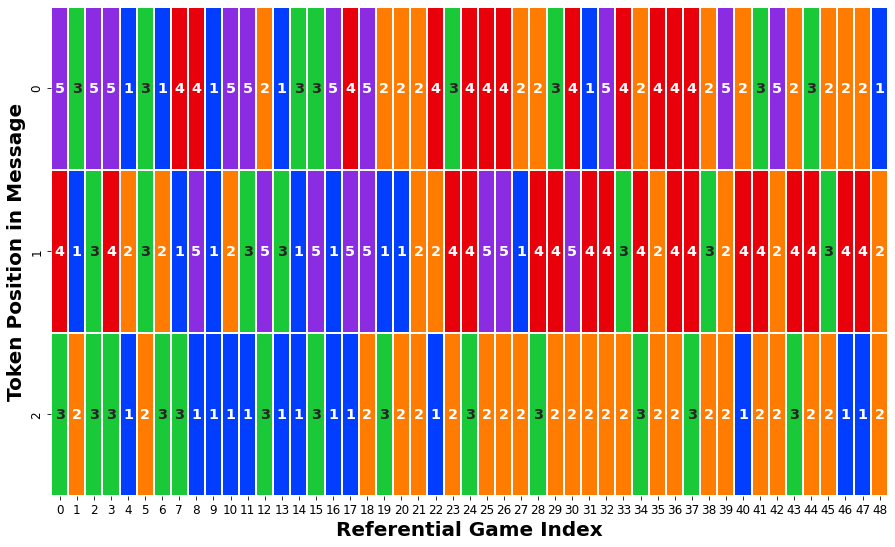

In [267]:
from matplotlib.colors import ListedColormap
# construct cmap
#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#flatui = ["#00008b", "#ffa500", "#2ecc71", "#95a5a6", "#3498db"]
#my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())
my_cmap = ListedColormap(sns.color_palette("bright", n_colors=5).as_hex())

# adjust visual balance
figsize = (15.0, 9.0)
f, ax = plt.subplots(1, 1, figsize=figsize)
sns.heatmap(
    array, 
    ax=ax,
    annot=True,
    linewidths=2.0,
    #square=True,
    cbar=False,
    cmap=my_cmap,#"YlGnBu",
    annot_kws={
        "fontsize":"large",
        "fontweight":"bold",
    }
)
ax.set_xlabel("Referential Game Index", fontsize=20, fontweight="bold")
ax.set_ylabel("Token Position in Message", fontsize=20, fontweight="bold")

plt.savefig(f"./posdis_speaker_messages.svg", dpi=1200)

In [268]:
#fig, axes = plt.subplots(config['nbr_latents'], 1, sharex=True, sharey=True)# figsize=(16,8))
#sns.set_palette("bright")
pw.overwrite_axisgrid() 

gs = []

for lidx in range(config['nbr_latents']):
    #sns.set_palette("bright")
    g = sns.JointGrid(
        data=df[df.dim==lidx], 
        x="Referential Game \n Index", 
        y="stimulus_value", 
        hue="latent_id",
        #palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True),
        palette=sns.color_palette("bright", n_colors=nbr_values_per_latent[lidx]),
        height=8,
        ratio=4,
    )
    gs.append( pw.load_seaborngrid(g, label=f"g{lidx}"))

    #g.plot(sns.scatterplot, sns.histplot)
    g.plot_joint(
        sns.scatterplot,
        legend=False, 
        #sizes=2.0,
        s=500.0,
        #fill=True,
    )
    g.plot_marginals(
        sns.kdeplot,
    )
    g.set_axis_labels('Referential Game Index', f'SCS Stimlus Value on Dim. #{lidx}',fontsize=26, fontweight="bold")

    """
    for vlid in range(nbr_values_per_latent[lidx]):
        sns.kdeplot(
            data=df[df.dim==lidx],
            #x="rg_id",
            y="stimulus",
            hue="latent_id", 
            linewidth=1.5, ax=g.ax_marg_y, fill=False,
            palette=sns.color_palette("bright", n_colors=nbr_values_per_latent[lidx]),
            legend=False,
        )
    """

    #sns.kdeplot(y=data2[:, 0], linewidth=1.5, ax=g.ax_marg_y, fill=True)
    g.ax_marg_x.set_axis_off()
    g.ax_marg_x.remove()
    
    #g.ax_joint.scatter(x=df[df.dim==lidx].rg_id, y=df[df.dim==lidx].stimulus, marker='D', s=30, label="A")
    
    #g.savefig('joint_grid_without_marg_y.png' , bbox_inches='tight')

    #sns.kdeplot(y=df.stimulus, linewidth=2, ax=g.ax_marg_y)
    for rgid in range(len(rg_id)):
        #g.refline(x=rgid+0.5, linestyle=":")
        g.refline(x=rgid, linestyle=":", markersize=50.0)
    g.ax_joint.set_xlim(left=-0.1, right=(rgid+1)//3+0.5) 
    g.ax_joint.set_ylim(bottom=-1.0,top=1.0)

    g.refline(y=-1, linestyle=":")
    g.refline(y=0, linestyle=":")
    g.refline(y=1, linestyle=":")
    g.fig.legend([],[], frameon=False)
    plt.savefig(f"./ld{lidx}.svg", dpi=1200)


<Figure size 432x288 with 0 Axes>

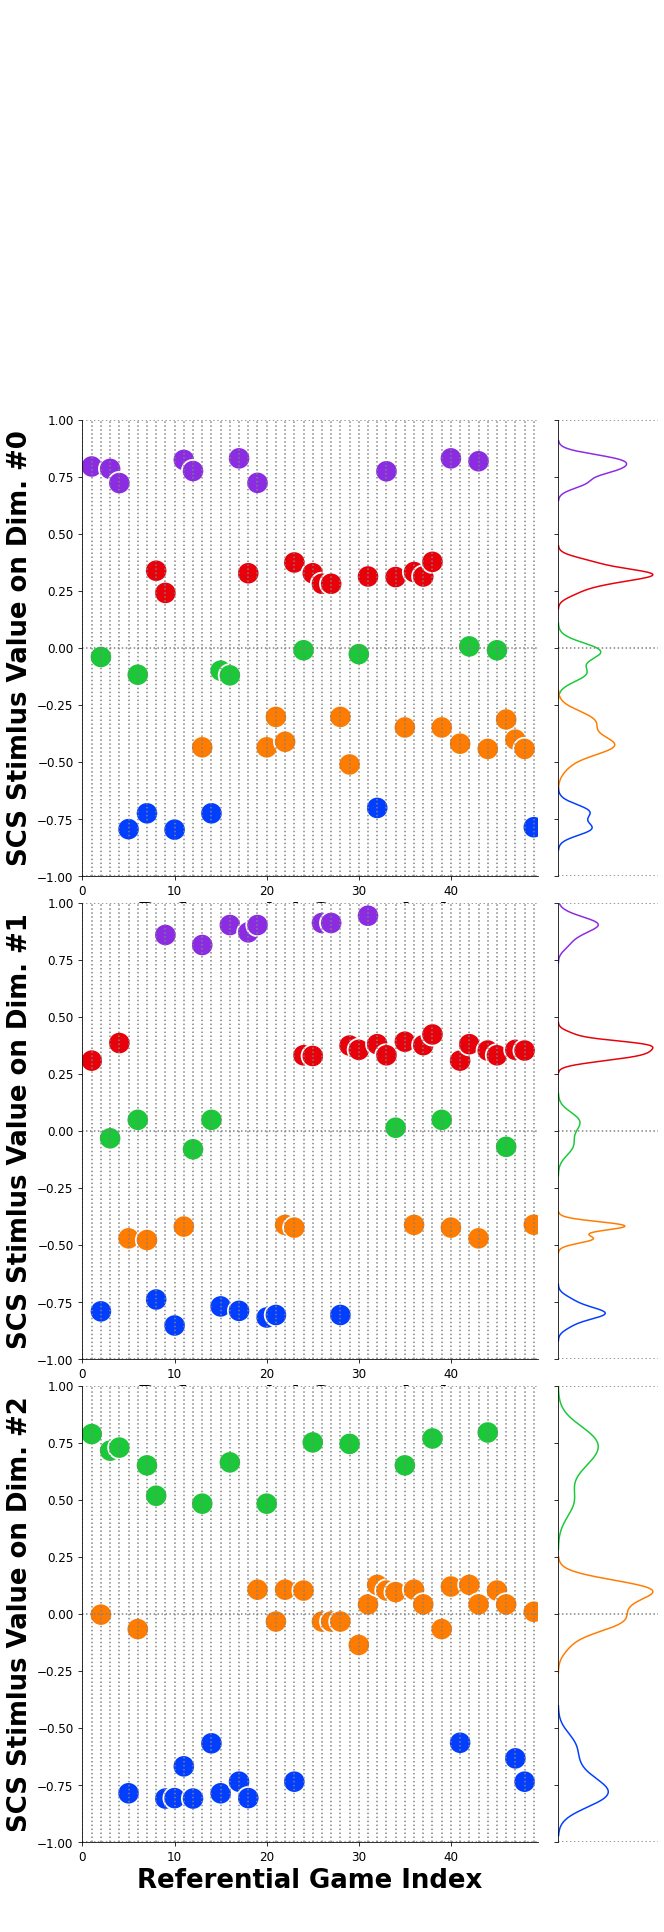

<Figure size 432x288 with 0 Axes>

In [269]:
pw.param['margin'] = -2.0
pw.param['dpi'] = 1024
plt.tight_layout()

final_ax = gs[0]/gs[1]/gs[2]
final_ax.savefig("./seaborn_subplots.svg")

In [19]:
print(pw.param)

{'margin': 0.01, 'dpi': 1024}
